# Medical Cost Personal Insurance Project 

Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region medical insurance is calculated .

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


## Imports

In [1]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Overview & Preparation
First, let's have a look at the data and see what we can observe/clean up.

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There's one duplicate that we can take care of, and there aren't any null values.

In [6]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = df.drop_duplicates()
print("Number of duplicates:")
df.duplicated().sum()

Number of duplicates:


0

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Male vs Female Percentage')

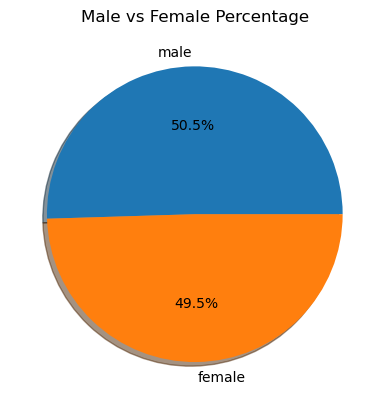

In [10]:
s = df['sex'].value_counts()
plt.pie(s, labels = s.index, autopct='%1.1f%%', shadow=True)
plt.title("Male vs Female Percentage")

This data is comprised of 50.5% males and 49.5% females.

Text(0.5, 1.0, 'Age Distribution')

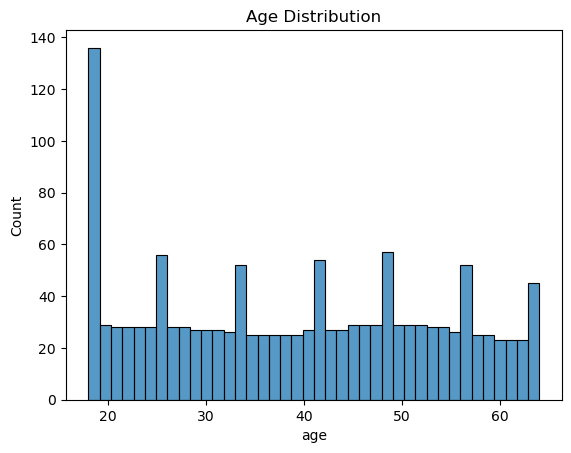

In [11]:
sns.histplot(data=df, x='age', bins=40)
plt.title("Age Distribution")

This dataset has a particularly high amount of individuals around the age of 20.

# Analysis
Below I'll examine the relationship between BMI, smoking status, and charges.

## Analysis of BMI and Charges
Let's dive deeper into understanding and visualizing this data. Below, I'll specify weight classes based on BMI to take a further look at how weight affects charges. I'll do this with a conditions list and np.select.
My prediction is that individuals in the "normal" category will pay the least, whereas underweight, overweight, and obese individuals will pay the most, with charges ascending in that order. 

In [12]:
bmi = df["bmi"]

cond_list = [bmi < 18.5, bmi < 25, bmi < 30, bmi >= 30]
choice_list = ['underweight', 'normal', 'overweight', 'obese']

df["bmi_cat"] = np.select(cond_list, choice_list)
df.head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
5,31,female,25.740,0,no,southeast,3756.62160,overweight
6,46,female,33.440,1,no,southeast,8240.58960,obese
7,37,female,27.740,3,no,northwest,7281.50560,overweight
8,37,male,29.830,2,no,northeast,6406.41070,overweight
9,60,female,25.840,0,no,northwest,28923.13692,overweight


Text(0, 0.5, 'Charges')

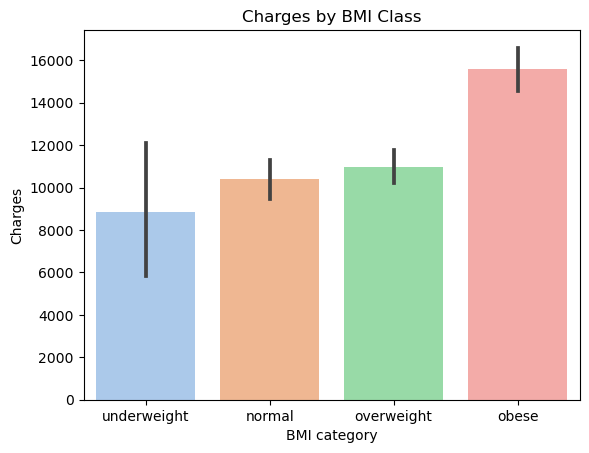

In [13]:
#Making it pretty
palette = sns.color_palette("pastel")
sns.set_palette(palette)

#Create plot
sns.barplot(data=df, x='bmi_cat', y='charges', order=['underweight', 'normal', 'overweight', 'obese'])
plt.title('Charges by BMI Class')
plt.xlabel('BMI category')
plt.ylabel('Charges')

**Insights**: The prediction was incorrect - underweight people appear to pay even less than individuals in the normal category. Overweight people pay slightly more than those of an average weight, and obese individuals pay much more. How much more do they pay exactly?

In [14]:
charges_by_cat = df.groupby('bmi_cat').charges.mean()
print(charges_by_cat)

bmi_cat
normal         10409.337709
obese          15572.041945
overweight     10987.509891
underweight     8852.200585
Name: charges, dtype: float64


Overweight people pay almost 600 dollars more, and about 5.5 percent more than those of an average weight. Obese individuals pay almost 5200 dollars more, an increase of 49.6 percent! How does an individual's region interact with their charges?

## Analysis of Region and Charges

Text(0, 0.5, 'Charges')

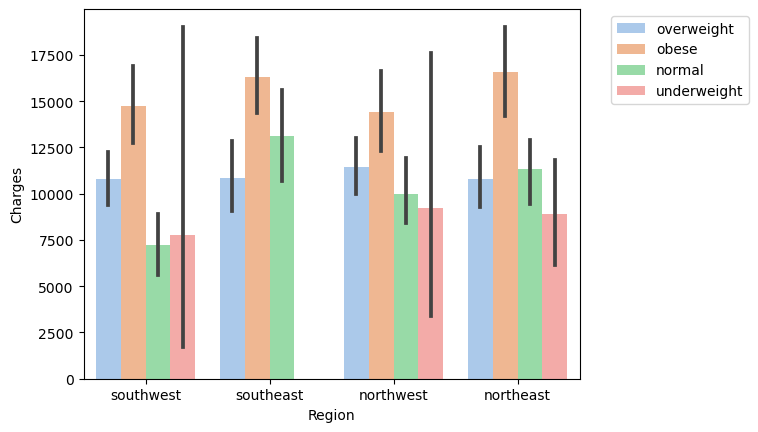

In [15]:
#Making it pretty
sns.set_palette(palette)
#Create plot
sns.barplot(x=df['region'], y=df['charges'], hue=df['bmi_cat'], )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Region")
plt.ylabel("Charges")

The southeast underweight category does not seem to be represented - is this because there were no reported cases in the dataset, or has there been an error? 

In [16]:
df.query('bmi < 18.5 and region == "southeast"')

,age,sex,bmi,children,smoker,region,charges,bmi_cat


In [17]:
len(df[(df['region']=='southeast') & (df['bmi_cat']=='underweight')])

0

This does not appear to be an error - the southeast has no representation in the underweight category.

Text(0.5, 1.0, 'BMI by Region')

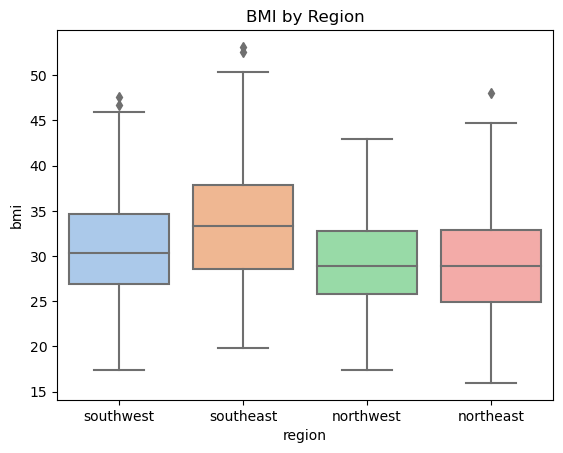

In [18]:
sns.set_palette(palette)
sns.boxplot(x = 'region', y = 'bmi', data = df)
plt.title("BMI by Region")

Region doesn't seem to make a drastic difference in the amount of people in each BMI category, but the southeast has the highest median BMI. Does the southeast happen to have the most smokers as well?

Text(0, 0.5, 'Amount of Smokers')

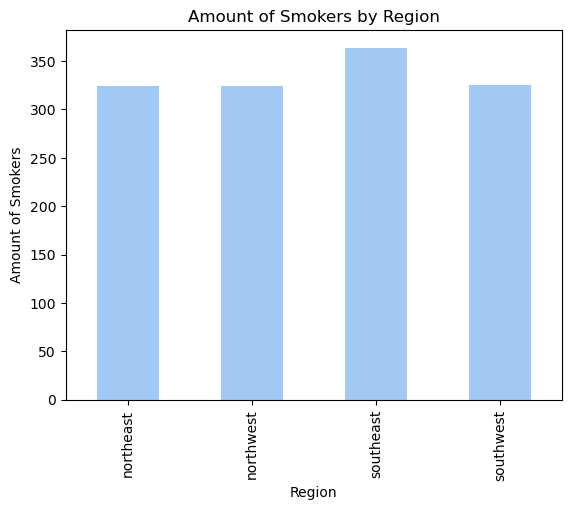

In [19]:
sns.set_palette(palette)
smokercount = df.groupby('region').smoker.count().plot(kind="bar")
plt.title("Amount of Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Amount of Smokers")

The southeast indeed seems to have the most smokers.

Text(0, 0.5, 'Charges')

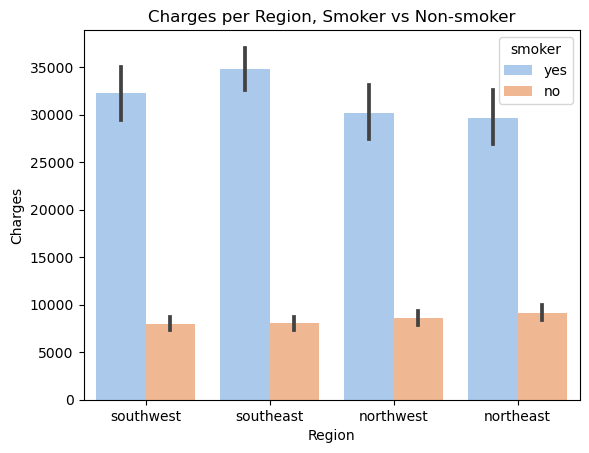

In [20]:
sns.barplot(x=df['region'], y=df['charges'], hue=df['smoker'],)
plt.title("Charges per Region, Smoker vs Non-smoker")
plt.xlabel("Region")
plt.ylabel("Charges")

The southeast has the most smokers and is leading in charges for them.

## Analysis of Smoking + BMI Category and Charges
As seen below, the average charge for smokers is 32,050 dollars, while the average charge for non-smokers is 8,440 dollars. What do charges look like when factoring in both BMI categories and smoking status?

In [21]:
charges_by_smoker = df.groupby('smoker').charges.mean()
print(charges_by_smoker)

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64


Text(0, 0.5, 'Charges')

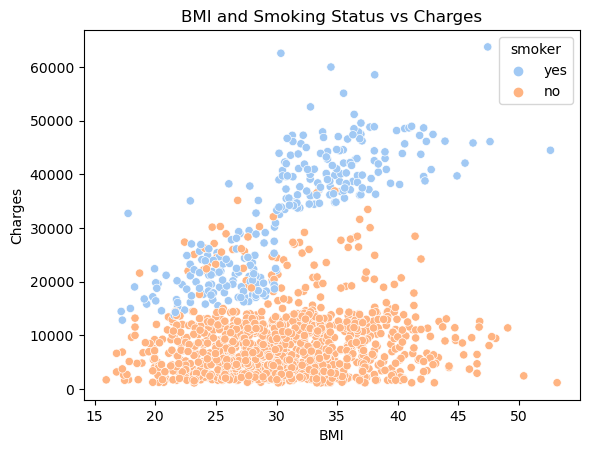

In [22]:
# Set the color palette
sns.set_palette(palette)

# Create a scatter plot
fig = sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

# Set the title and axis labels
plt.title("BMI and Smoking Status vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
 7   bmi_cat   1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 126.3+ KB


Charges increase drastically according to smoking status - smokers start off at a much higher level.

Text(53.37951388888888, 0.5, 'Charges')

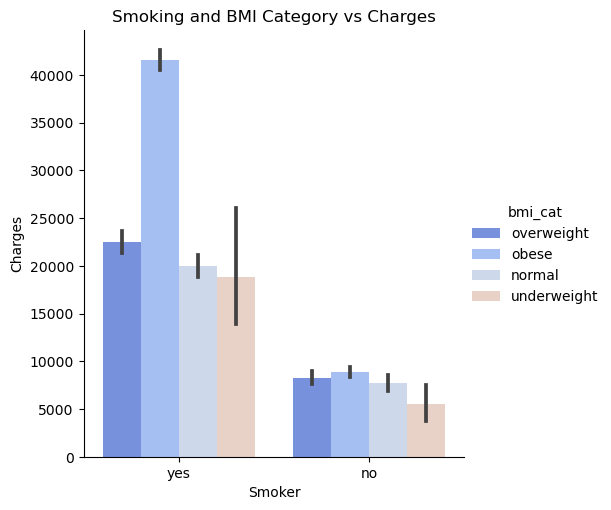

In [24]:
#Making it pretty
cwpalette = sns.color_palette("coolwarm")
sns.set_palette(cwpalette)

#Create plot
sns.catplot(data=df,y='charges', x='smoker', hue='bmi_cat', kind='bar', )
plt.title("Smoking and BMI Category vs Charges")
plt.xlabel('Smoker')
plt.ylabel('Charges')

**Insights**: Smokers clearly have much higher charges than non-smokers. As we can predict from the analysis of BMI category and charges, obese smokers have the highest charges by far.

## Analysis Summary
Charges rise following BMI category, with underweight individuals paying the least and obese individuals paying almost 50% more. These charges rise even higher if the individual is a smoker, and obese smokers have the highest charges of any group.

## Prediction Prep

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_cat'],
      dtype='object')

First I'll use some basic one-hot encoding.

In [26]:
df1 = df.copy()

In [27]:
#Dummies for region
dummyr = pd.get_dummies(df1.region, prefix='region')

In [28]:
df1 = df1.join(dummyr)

In [29]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,bmi_cat,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,obese,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,obese,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,normal,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,overweight,0,1,0,0


In [30]:
#Dummies for sex
dummys = pd.get_dummies(df.sex, prefix='sex')
df1 = df1.join(dummys)

In [31]:
#Dummies for smoker
dummysm = pd.get_dummies(df.smoker, prefix='smoker')
df1 = df1.join(dummysm)

In [32]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_cat', 'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes'],
      dtype='object')

In [33]:
df1.drop(['smoker', 'sex', 'region', 'bmi_cat'], axis = 1, inplace = True)

In [34]:
df1.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,1,0


# feature Scaling

In [35]:
#Grouping Features for Normalization
norm_ori = df1.drop(columns = ['charges']).columns
print(norm_ori)

Index(['age', 'bmi', 'children', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')


In [48]:
#Normalization Features
for i in range(len(norm_ori)):
    df1[norm_ori[i]] = MinMaxScaler().fit_transform(df1[norm_ori[i]].values.reshape(len(df1), 1))
    
#Check dfori
df1

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.217391,0.458434,0.6,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.326087,0.181464,0.0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.304348,0.347592,0.0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1334,0.000000,0.429379,0.0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,0.000000,0.562012,0.0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Model Training

In [49]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [50]:
#Best Hyperparameter Evaluation
def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [51]:
#Best Feature Importance Evaluation
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [53]:
#Separating Target & Features
x1 = df1.drop(columns = ['charges']) #Features
y1 = df1['charges'] #Target

In [54]:
#Splitting Train & Test 
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [56]:
print(df1['charges'])

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [57]:
#Modeling
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
    'RandomForest'     : RandomForestRegressor(),
    'Ridge'            : Ridge(),
    'Lasso'            : Lasso()
}

for model_name, model in models.items():
    model.fit(xtrain1, ytrain1)
    prediction1 = model.predict(xtest1)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, xtrain1, ytrain1, xtest1, ytest1), '\n')

Model: LinearRegression
MAE : 4227.09
RMSE : 6280.85
R2 score : 0.77
Train Accuracy : 0.7338670490812471
Test Accuracy : 0.7694620930823695
None 

Model: DecisionTree
MAE : 2746.54
RMSE : 6006.75
R2 score : 0.79
Train Accuracy : 1.0
Test Accuracy : 0.7891447741250102
None 

Model: RandomForest
MAE : 2537.70
RMSE : 4795.24
R2 score : 0.87
Train Accuracy : 0.9755005623649465
Test Accuracy : 0.8656227831199671
None 

Model: Ridge
MAE : 4171.59
RMSE : 6252.42
R2 score : 0.77
Train Accuracy : 0.7361982430485154
Test Accuracy : 0.7715450121117843
None 

Model: Lasso
MAE : 4181.08
RMSE : 6241.24
R2 score : 0.77
Train Accuracy : 0.736262955188729
Test Accuracy : 0.7723609978790456
None 



# Tuning Hyperparameter

In [78]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [79]:
#List Hyperparameters
hyperparameters = dict(
                       fit_intercept = [True, False],
                       n_jobs = [-1, 0, 1, 2],
                       normalize = [True, False],
                       copy_X = [True, False]
                      )

#Initiation
LR1 = LinearRegression()
LR_tuned1 = RandomizedSearchCV(LR1, hyperparameters, cv=5, random_state=42, scoring='r2')
LR_tuned1.fit(xtrain1, ytrain1)

# Predict & Evaluation
prediction1 = LR_tuned1.predict(xtest1)
evaluation(LR_tuned1, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4194.80
RMSE : 6261.79
R2 score : 0.77
Train Accuracy : 0.7354353995171626
Test Accuracy : 0.7708594405414821


In [80]:
#Check Best Hyperparameter
best_hyperparameter(LR_tuned1.best_estimator_, hyperparameters)

Best fit_intercept: False
Best n_jobs: 1
Best normalize: False
Best copy_X: False


In [62]:
alpha = [0.01, 0.1, 1, 2, 5, 10, 100]
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

Ridge1 = Ridge()
Ridge_tuned = RandomizedSearchCV(Ridge1, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
hyper_ridge = Ridge_tuned.fit(xtrain1, ytrain1)

In [63]:
prediction1 = hyper_ridge.predict(xtest1)
evaluation(hyper_ridge, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4180.76
RMSE : 6241.42
R2 score : 0.77
Train Accuracy : 0.7362630203501666
Test Accuracy : 0.7723478468707161


In [64]:
#Check Best Hyperparameter
best_hyperparameter(hyper_ridge.best_estimator_, hyperparameters)

Best alpha: 0.1
Best solver: lsqr
Best fit_intercept: True


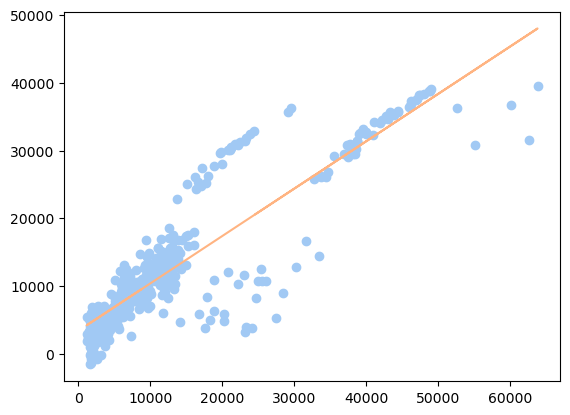

In [66]:
sns.set_palette(palette)
plt.plot(ytest1,prediction1,'o')
m,b = np.polyfit(ytest1,prediction1,1)
plt.plot(ytest1,m*ytest1+b)
plt.show()

# saving the model

In [68]:
import pickle

In [69]:
pickle.dump(model, open('insurance.pkl', 'wb'))

In [70]:
pickled_model = pickle.load(open('insurance.pkl', 'rb'))
pickled_model.predict(xtest1)

array([ 8.08687790e+03,  5.49973034e+03,  1.43231788e+04,  3.14092260e+04,
        8.87449415e+03,  1.31062519e+04,  3.01997540e+04,  1.24108446e+03,
        1.05754491e+04,  1.11975629e+04,  1.02741678e+04,  3.28257200e+04,
        3.08398488e+04,  1.74775370e+04,  1.08121758e+04,  9.38692878e+03,
        3.99729744e+03,  3.14343070e+04,  2.98070546e+03,  5.08121292e+03,
        3.41788939e+03,  3.00107843e+04,  1.49037493e+04,  3.00973802e+04,
        3.08338324e+04,  5.37037593e+03,  3.52572870e+04,  3.63232841e+04,
        1.14157105e+04,  1.41999158e+04,  6.47037957e+03,  1.26944693e+04,
        1.61916370e+02,  1.19907093e+04,  3.95352862e+04,  1.22799616e+04,
        4.48909618e+03,  3.67433330e+03,  3.05062832e+04,  8.84599206e+03,
        7.06947044e+03,  2.97834257e+04,  3.44816956e+04,  1.23087230e+04,
        7.17281847e+03,  3.23827829e+03,  6.22048745e+03,  8.86469543e+03,
        4.09198479e+03,  8.90422572e+03,  6.46449670e+03,  1.21638739e+04,
        3.09736023e+04,  